In [1]:
import canonical_toolkit as ctk

from canonical_toolkit.utils.initialize import intitialize_random_graph_population

In [2]:
graph_population = intitialize_random_graph_population(10, n_jobs=1)

Output()

In [3]:
node_population = [ctk.node_from_graph(graph) for graph in graph_population]

In [4]:
sim_config = ctk.SimilaritySpaceConfig(max_hop_radius=5)

In [5]:
population_fingerprint = ctk.collect_population_fingerprint(node_population, config=sim_config)

In [6]:
series = ctk.series_from_population_fingerprint(population_fingerprint)
print(series)

SimilaritySeries: WHOLE                                             
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃                          WHOLE                           ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [10×16777216] Sparse {'domain': 'FEATURES', 'radius': 0} │
│     1 │ [10×16777216] Sparse {'domain': 'FEATURES', 'radius': 1} │
│     2 │ [10×16777216] Sparse {'domain': 'FEATURES', 'radius': 2} │
│     3 │ [10×16777216] Sparse {'domain': 'FEATURES', 'radius': 3} │
│     4 │ [10×16777216] Sparse {'domain': 'FEATURES', 'radius': 4} │
│     5 │ [10×16777216] Sparse {'domain': 'FEATURES', 'radius': 5} │
└───────┴──────────────────────────────────────────────────────────┘

In [7]:
print(series[3])
series[3].save('__data__/folder/test')

loaded_matrix = ctk.SimilarityMatrix.load('__data__/folder/test')
print(loaded_matrix)

SimilarityMatrix: WHOLE               
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property ┃ Value                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Shape    │ [10×16777216]           │
│ Storage  │ Sparse (csr)            │
│ Non-zero │ 116 / 167,772,160       │
│ Sparsity │ 100.00%                 │
│ Domain   │ FEATURES                │
│ Radius   │ 3                       │
│ Samples  │   [0,10784] = 1.0000    │
│          │   [0,332632] = -1.0000  │
│          │   [0,359139] = 1.0000   │
│          │   [0,2873660] = -1.0000 │
│          │   [0,4100725] = 1.0000  │
│          │   ... (111 more)        │
└──────────┴─────────────────────────┘

SimilarityMatrix: WHOLE               
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property ┃ Value                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Shape    │ [10×16777216]           │
│ Storage  │ Sparse (csr)            │
│ Non-zero │ 116 / 167,772,160       │
│ Sparsity │ 100.00%                 │
│ Domain   │ FEATURES                │
│ Radius   │ 3                       │
│ Samples  │   [0,10784] = 1.0000    │
│          │   [0,332632] = -1.0000  │
│          │   [0,359139] = 1.0000   │
│          │   [0,2873660] = -1.0000 │
│          │   [0,4100725] = 1.0000  │
│          │   ... (111 more)        │
└──────────┴─────────────────────────┘

In [8]:
cosine_series = series.cosine_similarity(inplace=False)

print(cosine_series)
print(cosine_series[1])

SimilaritySeries: WHOLE                                        
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃                        WHOLE                        ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [10×10] Dense {'domain': 'SIMILARITY', 'radius': 0} │
│     1 │ [10×10] Dense {'domain': 'SIMILARITY', 'radius': 1} │
│     2 │ [10×10] Dense {'domain': 'SIMILARITY', 'radius': 2} │
│     3 │ [10×10] Dense {'domain': 'SIMILARITY', 'radius': 3} │
│     4 │ [10×10] Dense {'domain': 'SIMILARITY', 'radius': 4} │
│     5 │ [10×10] Dense {'domain': 'SIMILARITY', 'radius': 5} │
└───────┴─────────────────────────────────────────────────────┘

SimilarityMatrix: WHOLE                   
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property ┃ Value                       ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Shape    │ [10×10]                     │
│ Storage  │ Dense                       │
│ Domain   │ SIMILARITY                  │
│ Radius   │ 1                           │
│ Values   │ 1.00  0.00  ...  0.00  0.26 │
│          │ 0.00  1.00  ...  0.17  0.08 │
│          │ ...   ...   ...   ...       │
│          │ 0.00  0.17  ...  1.00  0.11 │
│          │ 0.26  0.08  ...  0.11  1.00 │
└──────────┴─────────────────────────────┘

In [9]:
config = ctk.UmapConfig(n_neighbors=2, metric="precomputed")

In [10]:
umap = cosine_series.umap_embed(config=config)

{'n_neighbors': 2, 'n_components': 2, 'metric': 'precomputed', 'random_state': 42, 'transform_seed': 42, 'n_jobs': 1}


/home/salo/projects/ariel-zoo/.venv/lib/python3.12/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


{'n_neighbors': 2, 'n_components': 2, 'metric': 'precomputed', 'random_state': 42, 'transform_seed': 42, 'n_jobs': 1}
{'n_neighbors': 2, 'n_components': 2, 'metric': 'precomputed', 'random_state': 42, 'transform_seed': 42, 'n_jobs': 1}
{'n_neighbors': 2, 'n_components': 2, 'metric': 'precomputed', 'random_state': 42, 'transform_seed': 42, 'n_jobs': 1}
{'n_neighbors': 2, 'n_components': 2, 'metric': 'precomputed', 'random_state': 42, 'transform_seed': 42, 'n_jobs': 1}
{'n_neighbors': 2, 'n_components': 2, 'metric': 'precomputed', 'random_state': 42, 'transform_seed': 42, 'n_jobs': 1}


/home/salo/projects/ariel-zoo/.venv/lib/python3.12/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/salo/projects/ariel-zoo/.venv/lib/python3.12/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/salo/projects/ariel-zoo/.venv/lib/python3.12/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/salo/projects/ariel-zoo/.venv/lib/python3.12/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/salo/projects/ariel-zoo/.venv/lib/python3.12/site-

In [11]:
print(umap)

SimilaritySeries: WHOLE                                      
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃                       WHOLE                       ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [10×2] Dense {'domain': 'EMBEDDING', 'radius': 0} │
│     1 │ [10×2] Dense {'domain': 'EMBEDDING', 'radius': 1} │
│     2 │ [10×2] Dense {'domain': 'EMBEDDING', 'radius': 2} │
│     3 │ [10×2] Dense {'domain': 'EMBEDDING', 'radius': 3} │
│     4 │ [10×2] Dense {'domain': 'EMBEDDING', 'radius': 4} │
│     5 │ [10×2] Dense {'domain': 'EMBEDDING', 'radius': 5} │
└───────┴───────────────────────────────────────────────────┘

In [12]:
population_fingerprint_left = ctk.collect_population_fingerprint(node_population, config=ctk.SimilaritySpaceConfig(space=ctk.Space.LEFT))

In [13]:
series_left = ctk.series_from_population_fingerprint(population_fingerprint_left, "LEFT")

In [14]:
frame = ctk.SimilarityFrame([series, series_left])
print(frame)

SimilarityFrame (2 series × 8 indices)                                         
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃              WHOLE               ┃               LEFT               ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [10×16777216] Sp domain:FEATURES │ [10×16777216] Sp domain:FEATURES │
│     1 │ [10×16777216] Sp domain:FEATURES │ [10×16777216] Sp domain:FEATURES │
│     2 │ [10×16777216] Sp domain:FEATURES │ [10×16777216] Sp domain:FEATURES │
│     3 │ [10×16777216] Sp domain:FEATURES │ [10×16777216] Sp domain:FEATURES │
│     4 │ [10×16777216] Sp domain:FEATURES │ [10×16777216] Sp domain:FEATURES │
│     5 │ [10×16777216] Sp domain:FEATURES │ [10×16777216] Sp domain:FEATURES │
│     6 │               ...                │ [10×16777216] Sp domain:FEATURES │
│     7 │               ...                │ [10×16777216] Sp domain:FEATURES │
└───────┴──────────────────────────────────┴──────────────────────────────────┘

---

In [15]:
graph_population = intitialize_random_graph_population(1000, n_jobs=1)

Output()

In [16]:
left_config = ctk.SimilaritySpaceConfig(space=ctk.Space.LEFT)
right_config = ctk.SimilaritySpaceConfig(space=ctk.Space.RIGHT)

space_configs = [left_config, right_config]

In [17]:
series = ctk.series_from_graph_population(graph_population, space_configs[1])
print(series)

SimilaritySeries: RIGHT                                                
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃                            RIGHT                            ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [1000×16777216] Sparse {'domain': 'FEATURES', 'radius': 0}  │
│     1 │ [1000×16777216] Sparse {'domain': 'FEATURES', 'radius': 1}  │
│     2 │ [1000×16777216] Sparse {'domain': 'FEATURES', 'radius': 2}  │
│     3 │ [1000×16777216] Sparse {'domain': 'FEATURES', 'radius': 3}  │
│     4 │ [1000×16777216] Sparse {'domain': 'FEATURES', 'radius': 4}  │
│     5 │ [1000×16777216] Sparse {'domain': 'FEATURES', 'radius': 5}  │
│     6 │ [1000×16777216] Sparse {'domain': 'FEATURES', 'radius': 6}  │
│     7 │ [1000×16777216] Sparse {'domain': 'FEATURES', 'radius': 7}  │
│     8 │ [1000×16777216] Sparse {'domain': 'FEATURES', 'radius': 8}  │
│     9 │ [1000×16777216] Sparse {'domain': 'FEATURES', 'radius': 9}  │
│    10 │ [1000×16777216] Sparse {'domain': 'FEATURES', 'radius': 10} │
│    11 │ [1000×16777216] Sparse {'domain': 'FEATURES', 'radius': 11} │
│    12 │ [1000×16777216] Sparse {'domain': 'FEATURES', 'radius': 12} │
│    13 │ [1000×16777216] Sparse {'domain': 'FEATURES', 'radius': 13} │
└───────┴─────────────────────────────────────────────────────────────┘

In [18]:
frame = ctk.frame_from_graph_population(graph_population, space_configs)
print(frame)

SimilarityFrame (2 series × 14 indices)                                            
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃                LEFT                ┃               RIGHT                ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [1000×16777216] Sp domain:FEATURES │ [1000×16777216] Sp domain:FEATURES │
│     1 │ [1000×16777216] Sp domain:FEATURES │ [1000×16777216] Sp domain:FEATURES │
│     2 │ [1000×16777216] Sp domain:FEATURES │ [1000×16777216] Sp domain:FEATURES │
│     3 │ [1000×16777216] Sp domain:FEATURES │ [1000×16777216] Sp domain:FEATURES │
│     4 │ [1000×16777216] Sp domain:FEATURES │ [1000×16777216] Sp domain:FEATURES │
│     5 │ [1000×16777216] Sp domain:FEATURES │ [1000×16777216] Sp domain:FEATURES │
│     6 │ [1000×16777216] Sp domain:FEATURES │ [1000×16777216] Sp domain:FEATURES │
│     7 │ [1000×16777216] Sp domain:FEATURES │ [1000×16777216] Sp domain:FEATURES │
│     8 │ [1000×16777216] Sp domain:FEATURES │ [1000×16777216] Sp domain:FEATURES │
│     9 │ [1000×16777216] Sp domain:FEATURES │ [1000×16777216] Sp domain:FEATURES │
│    10 │ [1000×16777216] Sp domain:FEATURES │ [1000×16777216] Sp domain:FEATURES │
│    11 │ [1000×16777216] Sp domain:FEATURES │ [1000×16777216] Sp domain:FEATURES │
│    12 │                ...                 │ [1000×16777216] Sp domain:FEATURES │
│    13 │                ...                 │ [1000×16777216] Sp domain:FEATURES │
└───────┴────────────────────────────────────┴────────────────────────────────────┘

In [19]:
new_frame = frame.map(ctk.SimilaritySeries.cosine_similarity, inplace=False)
print(new_frame)

SimilarityFrame (2 series × 14 indices)                                        
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃               LEFT               ┃              RIGHT               ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [1000×1000] Dn domain:SIMILARITY │ [1000×1000] Dn domain:SIMILARITY │
│     1 │ [1000×1000] Dn domain:SIMILARITY │ [1000×1000] Dn domain:SIMILARITY │
│     2 │ [1000×1000] Dn domain:SIMILARITY │ [1000×1000] Dn domain:SIMILARITY │
│     3 │ [1000×1000] Dn domain:SIMILARITY │ [1000×1000] Dn domain:SIMILARITY │
│     4 │ [1000×1000] Dn domain:SIMILARITY │ [1000×1000] Dn domain:SIMILARITY │
│     5 │ [1000×1000] Dn domain:SIMILARITY │ [1000×1000] Dn domain:SIMILARITY │
│     6 │ [1000×1000] Dn domain:SIMILARITY │ [1000×1000] Dn domain:SIMILARITY │
│     7 │ [1000×1000] Dn domain:SIMILARITY │ [1000×1000] Dn domain:SIMILARITY │
│     8 │ [1000×1000] Dn domain:SIMILARITY │ [1000×1000] Dn domain:SIMILARITY │
│     9 │ [1000×1000] Dn domain:SIMILARITY │ [1000×1000] Dn domain:SIMILARITY │
│    10 │ [1000×1000] Dn domain:SIMILARITY │ [1000×1000] Dn domain:SIMILARITY │
│    11 │ [1000×1000] Dn domain:SIMILARITY │ [1000×1000] Dn domain:SIMILARITY │
│    12 │               ...                │ [1000×1000] Dn domain:SIMILARITY │
│    13 │               ...                │ [1000×1000] Dn domain:SIMILARITY │
└───────┴──────────────────────────────────┴──────────────────────────────────┘

In [20]:
print(new_frame['RIGHT'])
print(new_frame['RIGHT'][1])
print(new_frame['RIGHT'][1][0])

new_frame.save()

SimilaritySeries: RIGHT                                             
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃                          RIGHT                           ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [1000×1000] Dense {'domain': 'SIMILARITY', 'radius': 0}  │
│     1 │ [1000×1000] Dense {'domain': 'SIMILARITY', 'radius': 1}  │
│     2 │ [1000×1000] Dense {'domain': 'SIMILARITY', 'radius': 2}  │
│     3 │ [1000×1000] Dense {'domain': 'SIMILARITY', 'radius': 3}  │
│     4 │ [1000×1000] Dense {'domain': 'SIMILARITY', 'radius': 4}  │
│     5 │ [1000×1000] Dense {'domain': 'SIMILARITY', 'radius': 5}  │
│     6 │ [1000×1000] Dense {'domain': 'SIMILARITY', 'radius': 6}  │
│     7 │ [1000×1000] Dense {'domain': 'SIMILARITY', 'radius': 7}  │
│     8 │ [1000×1000] Dense {'domain': 'SIMILARITY', 'radius': 8}  │
│     9 │ [1000×1000] Dense {'domain': 'SIMILARITY', 'radius': 9}  │
│    10 │ [1000×1000] Dense {'domain': 'SIMILARITY', 'radius': 10} │
│    11 │ [1000×1000] Dense {'domain': 'SIMILARITY', 'radius': 11} │
│    12 │ [1000×1000] Dense {'domain': 'SIMILARITY', 'radius': 12} │
│    13 │ [1000×1000] Dense {'domain': 'SIMILARITY', 'radius': 13} │
└───────┴──────────────────────────────────────────────────────────┘

SimilarityMatrix: RIGHT                   
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property ┃ Value                       ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Shape    │ [1000×1000]                 │
│ Storage  │ Dense                       │
│ Domain   │ SIMILARITY                  │
│ Radius   │ 1                           │
│ Values   │ 1.00  0.00  ...  0.00  0.00 │
│          │ 0.00  0.00  ...  0.00  0.00 │
│          │ ...   ...   ...   ...       │
│          │ 0.00  0.00  ...  0.00  0.00 │
│          │ 0.00  0.00  ...  0.00  0.00 │
└──────────┴─────────────────────────────┘


[1.000 0.000 0.000 0.000 0.000 0.000 0.277 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.289 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.577 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.277 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.289 0.000 0.000 0.000 0.316 0.000 0.000 0.236 0.000
 0.000 0.000 0.000 0.277 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0

---

In [21]:
graph_population = intitialize_random_graph_population(10, n_jobs=1)

config = ctk.SimilaritySpaceConfig(max_hop_radius=3)

Output()

In [22]:
series = ctk.series_from_graph_population(graph_population, space_config=config)
series.cosine_similarity()
matrix = series.aggregate()
matrix.normalize_by_radius()

SimilarityMatrix: AGGREGATED_WHOLE        
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property ┃ Value                       ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Shape    │ [10×10]                     │
│ Storage  │ Dense                       │
│ Domain   │ AGGREGATED_SIMILARITY       │
│ Radius   │ 3                           │
│ Values   │ 1.00  0.32  ...  0.38  0.20 │
│          │ 0.32  1.00  ...  0.29  0.19 │
│          │ ...   ...   ...   ...       │
│          │ 0.38  0.29  ...  1.00  0.25 │
│          │ 0.20  0.19  ...  0.25  1.00 │
└──────────┴─────────────────────────────┘

In [23]:
ctk.snapshot_saver(graph_population)

Output()

Saved 10/10 snapshots to /home/salo/projects/ariel-zoo/src/canonical_toolkit/tests/functional/__data__/snapshots

Output()

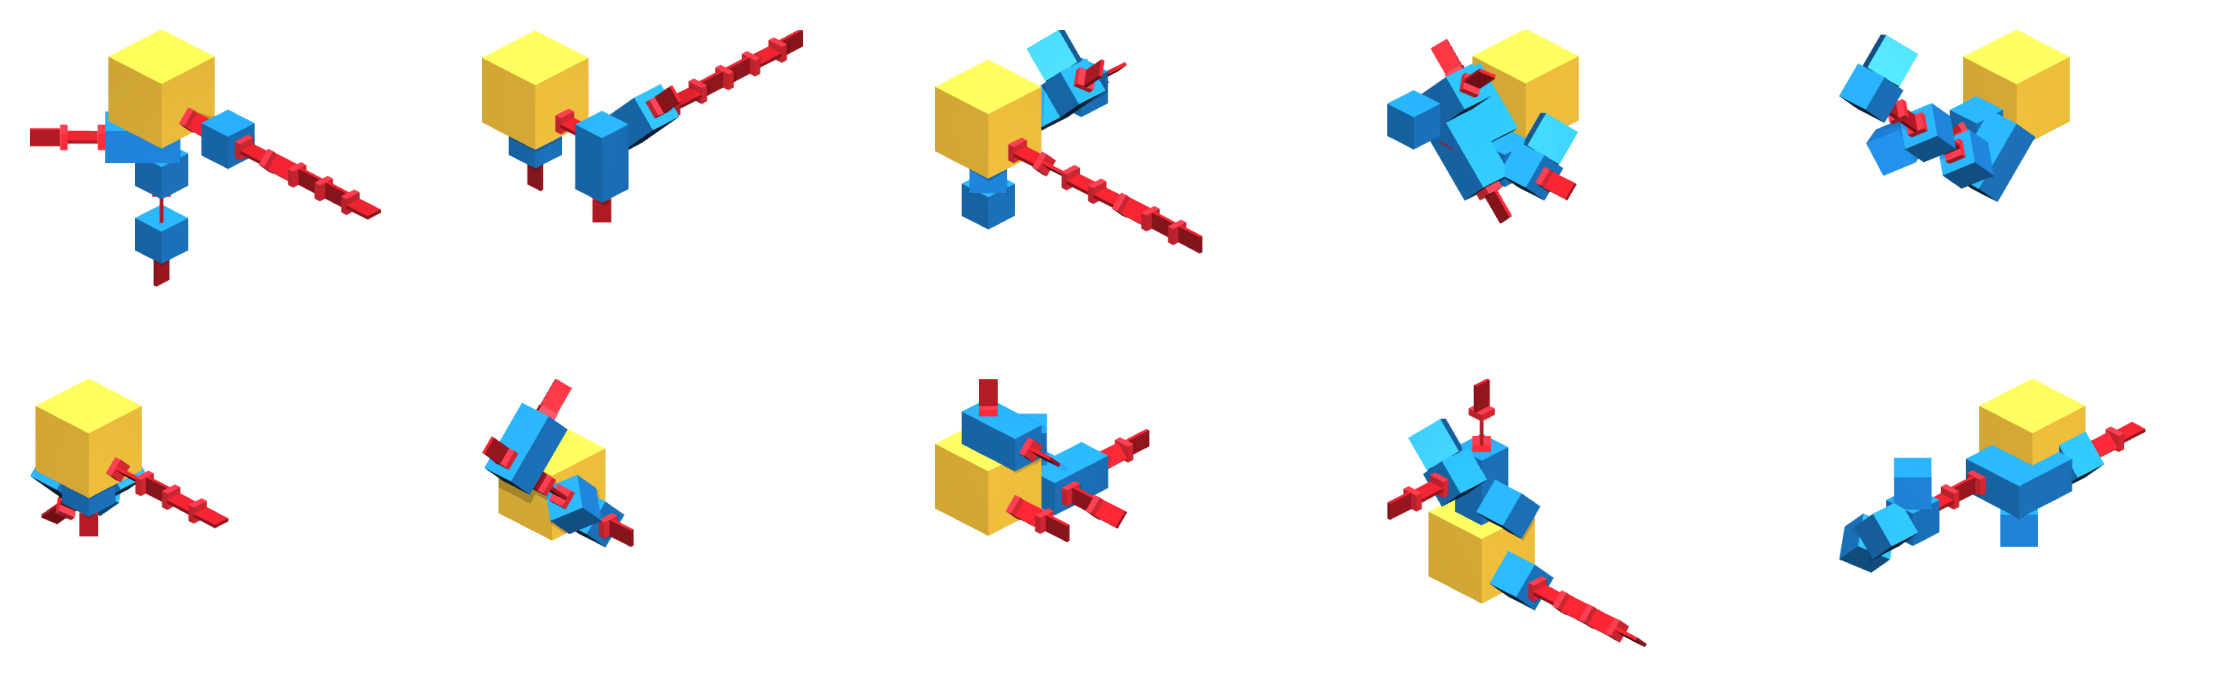

In [24]:
plotter = ctk.SnapshotGridPlotter.from_snapshot_folder("__data__/snapshots", grid_shape=(2, 5), snapshots_per_subplot=1)
plotter.plot()

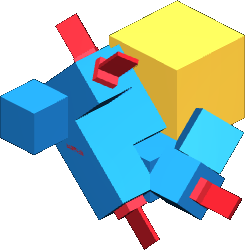

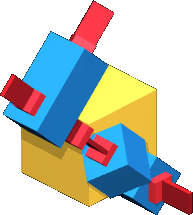

In [25]:
max_indices = matrix.get_max_indices(10)
ctk.quick_view(graph_population[max_indices[1][0]])
ctk.quick_view(graph_population[max_indices[1][1]])

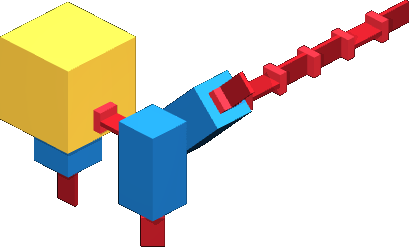

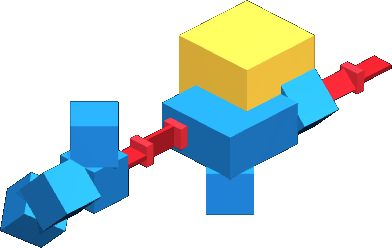

In [26]:
max_indices = matrix.get_min_indices(10)
ctk.quick_view(graph_population[max_indices[0][0]])
ctk.quick_view(graph_population[max_indices[0][1]])

---

In [27]:
max_r = 3

In [28]:
whole_config = ctk.SimilaritySpaceConfig(max_hop_radius=max_r, space=ctk.Space.WHOLE)
left_config = ctk.SimilaritySpaceConfig(max_hop_radius=max_r, space=ctk.Space.LEFT)
right_config = ctk.SimilaritySpaceConfig(max_hop_radius=max_r, space=ctk.Space.RIGHT)
front_config = ctk.SimilaritySpaceConfig(max_hop_radius=max_r, space=ctk.Space.FRONT)
back_config = ctk.SimilaritySpaceConfig(max_hop_radius=max_r, space=ctk.Space.BACK)
bottom_config = ctk.SimilaritySpaceConfig(max_hop_radius=max_r, space=ctk.Space.BOTTOM)
top_config = ctk.SimilaritySpaceConfig(max_hop_radius=max_r, space=ctk.Space.TOP)

all_configs = [whole_config, left_config, right_config, front_config, back_config, bottom_config, top_config]

In [29]:
feature_frame = ctk.frame_from_graph_population(graph_population, all_configs)
print(feature_frame)

SimilarityFrame (7 series × 4 indices)                                                                                                      
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Index ┃      WHOLE       ┃       LEFT       ┃      RIGHT       ┃      FRONT       ┃      BACK       ┃      BOTTOM      ┃       TOP       ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│     0 │ [10×16777216] Sp │ [10×16777216] Sp │ [10×16777216] Sp │ [10×16777216] Sp │  [10×16777216]  │ [10×16777216] Sp │  [10×16777216]  │
│       │ domain:FEATURES  │ domain:FEATURES  │ domain:FEATURES  │ domain:FEATURES  │       Sp        │ domain:FEATURES  │       Sp        │
│       │                  │                  │                  │                  │ domain:FEATURES │                  │ domain:FEATURES │
│     1 │ [10×16777216] Sp │ [10×16777216] Sp │ [10×16777216] Sp │ [10×16777216] Sp │  [10×16777216]  │ [10×16777216] Sp │  [10×16777216]  │
│       │ domain:FEATURES  │ domain:FEATURES  │ domain:FEATURES  │ domain:FEATURES  │       Sp        │ domain:FEATURES  │       Sp        │
│       │                  │                  │                  │                  │ domain:FEATURES │                  │ domain:FEATURES │
│     2 │ [10×16777216] Sp │ [10×16777216] Sp │ [10×16777216] Sp │ [10×16777216] Sp │  [10×16777216]  │ [10×16777216] Sp │  [10×16777216]  │
│       │ domain:FEATURES  │ domain:FEATURES  │ domain:FEATURES  │ domain:FEATURES  │       Sp        │ domain:FEATURES  │       Sp        │
│       │                  │                  │                  │                  │ domain:FEATURES │                  │ domain:FEATURES │
│     3 │ [10×16777216] Sp │ [10×16777216] Sp │ [10×16777216] Sp │ [10×16777216] Sp │  [10×16777216]  │ [10×16777216] Sp │  [10×16777216]  │
│       │ domain:FEATURES  │ domain:FEATURES  │ domain:FEATURES  │ domain:FEATURES  │       Sp        │ domain:FEATURES  │       Sp        │
│       │                  │                  │                  │                  │ domain:FEATURES │                  │ domain:FEATURES │
└───────┴──────────────────┴──────────────────┴──────────────────┴──────────────────┴─────────────────┴──────────────────┴─────────────────┘

In [30]:
cosine_frame = feature_frame.map(ctk.SimilaritySeries.cosine_similarity, inplace=False)

print(cosine_frame)
print(cosine_frame['WHOLE'][1])
print(cosine_frame['BACK'][1])
print(cosine_frame['TOP'][1])

aggregated = cosine_frame.aggregate()

print(aggregated)

double_aggregated = aggregated.aggregate()

print(double_aggregated)


SimilarityFrame (7 series × 4 indices)                                                                                                      
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Index ┃      WHOLE       ┃       LEFT       ┃      RIGHT       ┃      FRONT       ┃      BACK       ┃      BOTTOM      ┃       TOP       ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│     0 │    [10×10] Dn    │    [10×10] Dn    │    [10×10] Dn    │    [10×10] Dn    │   [10×10] Dn    │    [10×10] Dn    │   [10×10] Dn    │
│       │ domain:SIMILARI… │ domain:SIMILARI… │ domain:SIMILARI… │ domain:SIMILARI… │ domain:SIMILAR… │ domain:SIMILARI… │ domain:SIMILAR… │
│     1 │    [10×10] Dn    │    [10×10] Dn    │    [10×10] Dn    │    [10×10] Dn    │   [10×10] Dn    │    [10×10] Dn    │   [10×10] Dn    │
│       │ domain:SIMILARI… │ domain:SIMILARI… │ domain:SIMILARI… │ domain:SIMILARI… │ domain:SIMILAR… │ domain:SIMILARI… │ domain:SIMILAR… │
│     2 │    [10×10] Dn    │    [10×10] Dn    │    [10×10] Dn    │    [10×10] Dn    │   [10×10] Dn    │    [10×10] Dn    │   [10×10] Dn    │
│       │ domain:SIMILARI… │ domain:SIMILARI… │ domain:SIMILARI… │ domain:SIMILARI… │ domain:SIMILAR… │ domain:SIMILARI… │ domain:SIMILAR… │
│     3 │    [10×10] Dn    │    [10×10] Dn    │    [10×10] Dn    │    [10×10] Dn    │   [10×10] Dn    │    [10×10] Dn    │   [10×10] Dn    │
│       │ domain:SIMILARI… │ domain:SIMILARI… │ domain:SIMILARI… │ domain:SIMILARI… │ domain:SIMILAR… │ domain:SIMILARI… │ domain:SIMILAR… │
└───────┴──────────────────┴──────────────────┴──────────────────┴──────────────────┴─────────────────┴──────────────────┴─────────────────┘

SimilarityMatrix: WHOLE                   
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property ┃ Value                       ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Shape    │ [10×10]                     │
│ Storage  │ Dense                       │
│ Domain   │ SIMILARITY                  │
│ Radius   │ 1                           │
│ Values   │ 1.00  0.29  ...  0.34  0.06 │
│          │ 0.29  1.00  ...  0.18  0.00 │
│          │ ...   ...   ...   ...       │
│          │ 0.34  0.18  ...  1.00  0.13 │
│          │ 0.06  0.00  ...  0.13  1.00 │
└──────────┴─────────────────────────────┘

SimilarityMatrix: BACK                    
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property ┃ Value                       ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Shape    │ [10×10]                     │
│ Storage  │ Dense                       │
│ Domain   │ SIMILARITY                  │
│ Radius   │ 1                           │
│ Values   │ 0.00  0.00  ...  0.00  0.00 │
│          │ 0.00  0.00  ...  0.00  0.00 │
│          │ ...   ...   ...   ...       │
│          │ 0.00  0.00  ...  0.00  0.00 │
│          │ 0.00  0.00  ...  0.00  0.00 │
└──────────┴─────────────────────────────┘

SimilarityMatrix: TOP                     
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property ┃ Value                       ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Shape    │ [10×10]                     │
│ Storage  │ Dense                       │
│ Domain   │ SIMILARITY                  │
│ Radius   │ 1                           │
│ Values   │ 0.00  0.00  ...  0.00  0.00 │
│          │ 0.00  0.00  ...  0.00  0.00 │
│          │ ...   ...   ...   ...       │
│          │ 0.00  0.00  ...  1.00  0.00 │
│          │ 0.00  0.00  ...  0.00  0.00 │
└──────────┴─────────────────────────────┘

SimilaritySeries: AGGREGATED                                       
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃                       AGGREGATED                        ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [10×10] Dense {'domain': "{'SIMILARITY'}", 'radius': 0} │
│     1 │ [10×10] Dense {'domain': "{'SIMILARITY'}", 'radius': 1} │
│     2 │ [10×10] Dense {'domain': "{'SIMILARITY'}", 'radius': 2} │
│     3 │ [10×10] Dense {'domain': "{'SIMILARITY'}", 'radius': 3} │
└───────┴─────────────────────────────────────────────────────────┘

SimilarityMatrix: AGGREGATED_AGGREGATED    
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property ┃ Value                        ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Shape    │ [10×10]                      │
│ Storage  │ Dense                        │
│ Domain   │ AGGREGATED_{'SIMILARITY'}    │
│ Radius   │ 3                            │
│ Values   │ 12.00  3.83  ...  3.51  0.81 │
│          │ 3.83  10.00  ...  2.52  0.75 │
│          │ ...   ...   ...   ...        │
│          │ 3.51  2.52  ...  12.00  0.98 │
│          │ 0.81  0.75  ...  0.98  8.00  │
└──────────┴──────────────────────────────┘

3.8259850950436536


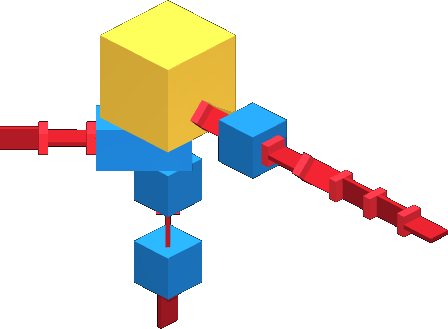

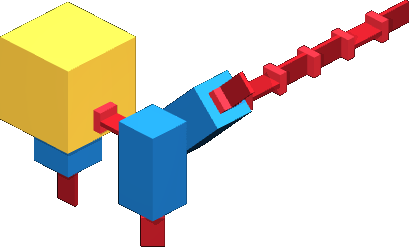

In [31]:
max_indices = double_aggregated.get_max_indices(10)

print(double_aggregated[max_indices[0]])

ctk.quick_view(graph_population[max_indices[0][0]])
ctk.quick_view(graph_population[max_indices[0][1]])

In [32]:
cosine_frame = feature_frame.map(ctk.SimilaritySeries.cosine_similarity, inplace=False)
print(cosine_frame[:, 1:])

cosine_frame = cosine_frame[["LEFT", "RIGHT", "FRONT", "BACK", "TOP", "BOTTOM"]]
print(cosine_frame)

aggregated = cosine_frame.aggregate()

print(aggregated)

double_aggregated = aggregated.aggregate()

print(double_aggregated)


SimilarityFrame (6 series × 4 indices)                                                                                                      
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃        LEFT         ┃        RIGHT        ┃        FRONT        ┃        BACK         ┃       BOTTOM       ┃         TOP         ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│     0 │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn     │     [10×10] Dn      │
│       │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │ domain:SIMILARITY  │  domain:SIMILARITY  │
│     1 │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn     │     [10×10] Dn      │
│       │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │ domain:SIMILARITY  │  domain:SIMILARITY  │
│     2 │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn     │     [10×10] Dn      │
│       │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │ domain:SIMILARITY  │  domain:SIMILARITY  │
│     3 │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn     │     [10×10] Dn      │
│       │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │ domain:SIMILARITY  │  domain:SIMILARITY  │
└───────┴─────────────────────┴─────────────────────┴─────────────────────┴─────────────────────┴────────────────────┴─────────────────────┘

SimilarityFrame (6 series × 4 indices)                                                                                                      
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃        LEFT         ┃        RIGHT        ┃        FRONT        ┃        BACK         ┃        TOP         ┃       BOTTOM        ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│     0 │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn     │     [10×10] Dn      │
│       │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │ domain:SIMILARITY  │  domain:SIMILARITY  │
│     1 │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn     │     [10×10] Dn      │
│       │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │ domain:SIMILARITY  │  domain:SIMILARITY  │
│     2 │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn     │     [10×10] Dn      │
│       │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │ domain:SIMILARITY  │  domain:SIMILARITY  │
│     3 │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn      │     [10×10] Dn     │     [10×10] Dn      │
│       │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │  domain:SIMILARITY  │ domain:SIMILARITY  │  domain:SIMILARITY  │
└───────┴─────────────────────┴─────────────────────┴─────────────────────┴─────────────────────┴────────────────────┴─────────────────────┘

SimilaritySeries: AGGREGATED                                       
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃                       AGGREGATED                        ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [10×10] Dense {'domain': "{'SIMILARITY'}", 'radius': 0} │
│     1 │ [10×10] Dense {'domain': "{'SIMILARITY'}", 'radius': 1} │
│     2 │ [10×10] Dense {'domain': "{'SIMILARITY'}", 'radius': 2} │
│     3 │ [10×10] Dense {'domain': "{'SIMILARITY'}", 'radius': 3} │
└───────┴─────────────────────────────────────────────────────────┘

SimilarityMatrix: AGGREGATED_AGGREGATED   
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property ┃ Value                       ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Shape    │ [10×10]                     │
│ Storage  │ Dense                       │
│ Domain   │ AGGREGATED_{'SIMILARITY'}   │
│ Radius   │ 3                           │
│ Values   │ 8.00  2.53  ...  2.00  0.00 │
│          │ 2.53  6.00  ...  1.36  0.00 │
│          │ ...   ...   ...   ...       │
│          │ 2.00  1.36  ...  8.00  0.00 │
│          │ 0.00  0.00  ...  0.00  4.00 │
└──────────┴─────────────────────────────┘

2.5313572695492588


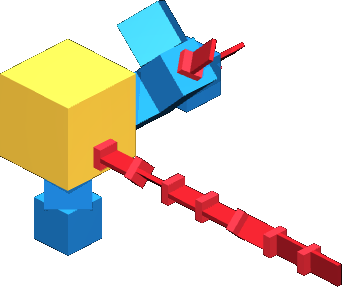

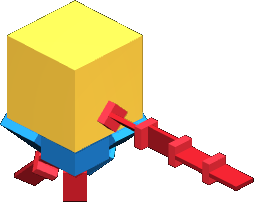

In [33]:
max_indices = double_aggregated.get_max_indices(10)

print(double_aggregated[max_indices[0]])

ctk.quick_view(graph_population[max_indices[1][0]])
ctk.quick_view(graph_population[max_indices[1][1]])

---

In [ ]:
config_radial = ctk.SimilaritySpaceConfig(space=ctk.Space.RADIAL)
config_axial = ctk.SimilaritySpaceConfig(space=ctk.Space.AXIAL)

feature_frame = ctk.frame_from_graph_population(graph_population, [config_radial, config_axial])

In [35]:
print(feature_frame)

SimilarityFrame (2 series × 12 indices)                                        
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃              RADIAL              ┃              AXIAL               ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [10×16777216] Sp domain:FEATURES │ [10×16777216] Sp domain:FEATURES │
│     1 │ [10×16777216] Sp domain:FEATURES │ [10×16777216] Sp domain:FEATURES │
│     2 │ [10×16777216] Sp domain:FEATURES │ [10×16777216] Sp domain:FEATURES │
│     3 │ [10×16777216] Sp domain:FEATURES │ [10×16777216] Sp domain:FEATURES │
│     4 │ [10×16777216] Sp domain:FEATURES │ [10×16777216] Sp domain:FEATURES │
│     5 │ [10×16777216] Sp domain:FEATURES │ [10×16777216] Sp domain:FEATURES │
│     6 │ [10×16777216] Sp domain:FEATURES │ [10×16777216] Sp domain:FEATURES │
│     7 │ [10×16777216] Sp domain:FEATURES │ [10×16777216] Sp domain:FEATURES │
│     8 │ [10×16777216] Sp domain:FEATURES │               ...                │
│     9 │ [10×16777216] Sp domain:FEATURES │               ...                │
│    10 │ [10×16777216] Sp domain:FEATURES │               ...                │
│    11 │ [10×16777216] Sp domain:FEATURES │               ...                │
└───────┴──────────────────────────────────┴──────────────────────────────────┘

In [36]:
cosine_series = feature_frame.map(ctk.SimilaritySeries.cosine_similarity, inplace=False)

In [37]:
print(cosine_series['RADIAL'][0][0])
print(cosine_series['RADIAL'][1][0])
print(cosine_series['RADIAL'][2][0])
print(cosine_series['RADIAL'][3][0])

[1.000 0.967 0.941 0.593 0.595 0.984 0.876 0.914 0.994 0.525]
[1.000 0.189 0.243 0.000 0.000 0.000 0.000 0.000 0.433 0.000]
[1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.289 0.000]
[1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.125 0.000]


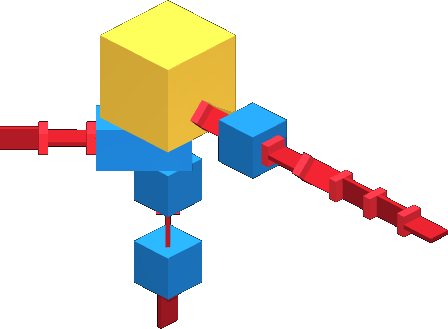

In [38]:
ctk.quick_view(graph_population[0])

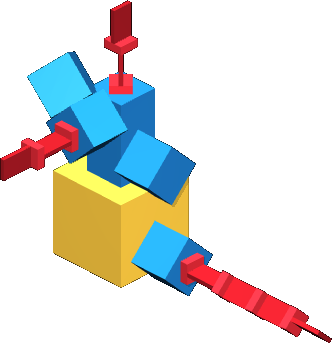

In [39]:
ctk.quick_view(graph_population[-2])

In [40]:
config_radial = ctk.SimilaritySpaceConfig(space=ctk.Space.RADIAL)

feature_frame = ctk.frame_from_graph_population(graph_population, [config_radial, top_config, bottom_config])
cosine_series = feature_frame.map(ctk.SimilaritySeries.cosine_similarity, inplace=False)

print(cosine_series)

SimilarityFrame (3 series × 12 indices)                                                               
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃            RADIAL            ┃             TOP              ┃            BOTTOM            ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [10×10] Dn domain:SIMILARITY │ [10×10] Dn domain:SIMILARITY │ [10×10] Dn domain:SIMILARITY │
│     1 │ [10×10] Dn domain:SIMILARITY │ [10×10] Dn domain:SIMILARITY │ [10×10] Dn domain:SIMILARITY │
│     2 │ [10×10] Dn domain:SIMILARITY │ [10×10] Dn domain:SIMILARITY │ [10×10] Dn domain:SIMILARITY │
│     3 │ [10×10] Dn domain:SIMILARITY │ [10×10] Dn domain:SIMILARITY │ [10×10] Dn domain:SIMILARITY │
│     4 │ [10×10] Dn domain:SIMILARITY │             ...              │             ...              │
│     5 │ [10×10] Dn domain:SIMILARITY │             ...              │             ...              │
│     6 │ [10×10] Dn domain:SIMILARITY │             ...              │             ...              │
│     7 │ [10×10] Dn domain:SIMILARITY │             ...              │             ...              │
│     8 │ [10×10] Dn domain:SIMILARITY │             ...              │             ...              │
│     9 │ [10×10] Dn domain:SIMILARITY │             ...              │             ...              │
│    10 │ [10×10] Dn domain:SIMILARITY │             ...              │             ...              │
│    11 │ [10×10] Dn domain:SIMILARITY │             ...              │             ...              │
└───────┴──────────────────────────────┴──────────────────────────────┴──────────────────────────────┘

In [41]:
print(cosine_series['TOP'][0][7])
print(cosine_series['TOP'][1][7])
print(cosine_series['TOP'][2][7])
print(cosine_series['TOP'][3][7])

[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.994 0.000]
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000]
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000]
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000]


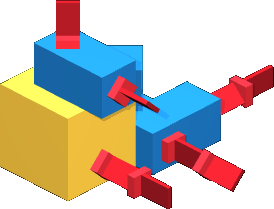

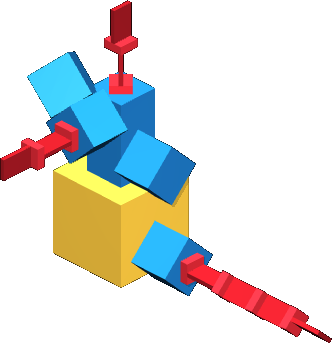

In [42]:
ctk.quick_view(graph_population[7])
ctk.quick_view(graph_population[8])

In [43]:
hash_fingerprint = ctk.collect_hash_fingerprint(ctk.node_from_graph(graph_population[7]), config=top_config)
from rich.console import Console
console = Console()
console.print(hash_fingerprint)

hash_fingerprint2 = ctk.collect_hash_fingerprint(ctk.node_from_graph(graph_population[8]), config=top_config)
console.print(hash_fingerprint2)

{
    0: ['A_t__r0__B', 'A_t__r0__H', 'A_t__r0__B', 'A_t__r0__H'],
    1: ['A_t__r1__B[l(B)]H3', 'A_t__r1__BH3', 'A_t__r1__B[l(BH3)]', 'A_t__r1__BH3'],
    2: ['A_t__r2__B[l(B6H1)]H7', 'A_t__r2__B[l(B)]H3', 'A_t__r2__B[l(B6H1)]H7', 'A_t__r2__B[l(BH3)]'],
    3: ['A_t__r3__B[l(B6H1)]H7', 'A_t__r3__B[l(B6H1)]H7']
}

{
    0: [
        'A_t__r0__B',
        'A_t__r0__B',
        'A_t__r0__H',
        'A_t__r0__H',
        'A_t__r0__B',
        'A_t__r0__H',
        'A_t__r0__H',
        'A_t__r0__B',
        'A_t__r0__B'
    ],
    1: [
        'A_t__r1__B[l(B1)]B',
        'A_t__r1__BB[t(B1)]H1',
        'A_t__r1__BH1H3',
        'A_t__r1__HH3',
        'A_t__r1__B[l(B7[b(B1)]H1)]',
        'A_t__r1__BH3H2',
        'A_t__r1__HH2',
        'A_t__r1__B[l(B5)]',
        'A_t__r1__B[l(B1)]'
    ],
    2: [
        'A_t__r2__B[l(B1)]B[t(B1)]H1',
        'A_t__r2__B[l(B1)]B[t(B1[b(B1)]H1)]H1H3',
        'A_t__r2__BB[t(B1)]H1H3',
        'A_t__r2__BH3H3',
        'A_t__r2__BB[t(B1[b(B1)]H1H2)]H1',
        'A_t__r2__B[l(B5[l(B1)]H3H2)]',
        'A_t__r2__BH3H2',
        'A_t__r2__B[l(B5[l(B1)]H3)]',
        'A_t__r2__B[l(B1)]B'
    ],
    3: [
        'A_t__r3__B[l(B7)]B6[r(B1[l(B1)]H3)]H3H3',
        'A_t__r3__B[l(B7)]B6[r(B1[l(B1)]H3H2)]H3H3',
        'A_t__r3__B[l(B7)]B6[r(B1[l(B1)]H3)]H3H3',
        'A_t__r3__BB[r(B1)]H3H3',
        'A_t__r3__B[l(B7)]B6[r(B1[l(B1)]H3H2)]H3H3',
        'A_t__r3__BB[r(B1[l(B1)]H3H2)]H3',
        'A_t__r3__B[l(B7[b(B1)]H1H2)]',
        'A_t__r3__BB[r(B1[l(B1)]H3H2)]H3',
        'A_t__r3__B[l(B7)]B6[r(B1)]H3'
    ]
}